<a href="https://colab.research.google.com/github/tylee33/DLforFinance/blob/master/%E1%84%8C%E1%85%B5%E1%84%92%E1%85%A1%E1%84%8E%E1%85%A5%E1%86%AF_%E1%84%89%E1%85%B3%E1%86%BC%E1%84%92%E1%85%A1%E1%84%8E%E1%85%A1_%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%8B%E1%85%AF%E1%86%AB_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 지하철 승하차 인원 분석

### Data Link 서울시 지하철 호선별 승하차 인원 정보 데이터
### http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

metro_all = pd.read_csv("./서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding='cp949')

metro_all.head()

metro_all.info()

sorted(list(set(metro_all['사용월'])))

sorted(list(set(metro_all['호선명'])))

sorted(list(set(metro_all['지하철역'])))

len(list(set(metro_all['지하철역'])))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59408 entries, 0 to 59407
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           59408 non-null  int64 
 1   호선명           59408 non-null  object
 2   지하철역          59408 non-null  object
 3   04시-05시 승차인원  59408 non-null  int64 
 4   04시-05시 하차인원  59408 non-null  int64 
 5   05시-06시 승차인원  59408 non-null  int64 
 6   05시-06시 하차인원  59408 non-null  int64 
 7   06시-07시 승차인원  59408 non-null  int64 
 8   06시-07시 하차인원  59408 non-null  int64 
 9   07시-08시 승차인원  59408 non-null  int64 
 10  07시-08시 하차인원  59408 non-null  int64 
 11  08시-09시 승차인원  59408 non-null  int64 
 12  08시-09시 하차인원  59408 non-null  int64 
 13  09시-10시 승차인원  59408 non-null  int64 
 14  09시-10시 하차인원  59408 non-null  int64 
 15  10시-11시 승차인원  59408 non-null  int64 
 16  10시-11시 하차인원  59408 non-null  int64 
 17  11시-12시 승차인원  59408 non-null  int64 
 18  11시-12시 하차인원  59408 non-null  int64 
 19  12시-

589

In [ ]:
# 2021년 6월 총 승객수만 추출
metro_recent = metro_all[metro_all['사용월']==202106]
metro_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
14070,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,8211,16,1434,1,1,0,0,0,0,20210703
14071,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,2589,4,1348,0,0,0,0,0,0,20210703
14072,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,8024,30,637,0,1,0,0,0,0,20210703
14073,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,1485,3,92,0,0,0,0,0,0,20210703
14074,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,5451,10,449,0,0,0,0,0,0,20210703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14673,202106,중앙선,원덕,47,1,350,7,653,225,882,...,219,1,61,0,0,0,0,0,0,20210703
14674,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,...,4161,9,273,0,0,0,0,0,0,20210703
14675,202106,중앙선,지평,0,0,0,0,1,0,377,...,0,0,0,0,0,0,0,0,0,20210703
14676,202106,중앙선,팔당,2,1,267,132,722,675,1546,...,251,0,0,0,0,0,0,0,0,20210703


In [ ]:
# 불필요한 작업일자 컬럼 제거
metro_recent = metro_recent.drop(columns={'작업일자'})
metro_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
14070,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,2811,8211,16,1434,1,1,0,0,0,0
14071,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,1035,2589,4,1348,0,0,0,0,0,0
14072,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,11581,8024,30,637,0,1,0,0,0,0
14073,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,4390,1485,3,92,0,0,0,0,0,0
14074,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,1952,5451,10,449,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14673,202106,중앙선,원덕,47,1,350,7,653,225,882,...,2,219,1,61,0,0,0,0,0,0
14674,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,...,640,4161,9,273,0,0,0,0,0,0
14675,202106,중앙선,지평,0,0,0,0,1,0,377,...,0,0,0,0,0,0,0,0,0,0
14676,202106,중앙선,팔당,2,1,267,132,722,675,1546,...,178,251,0,0,0,0,0,0,0,0


## 데이터 시각화

In [ ]:
# 한글 폰트 적용
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

/var/folders/rf/xczzxbyd4p3ffh0_wcsz20xr0000gn/T/ipykernel_44885/3749098970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metro_line = metro_recent.groupby(['호선명']).mean().reset_index()


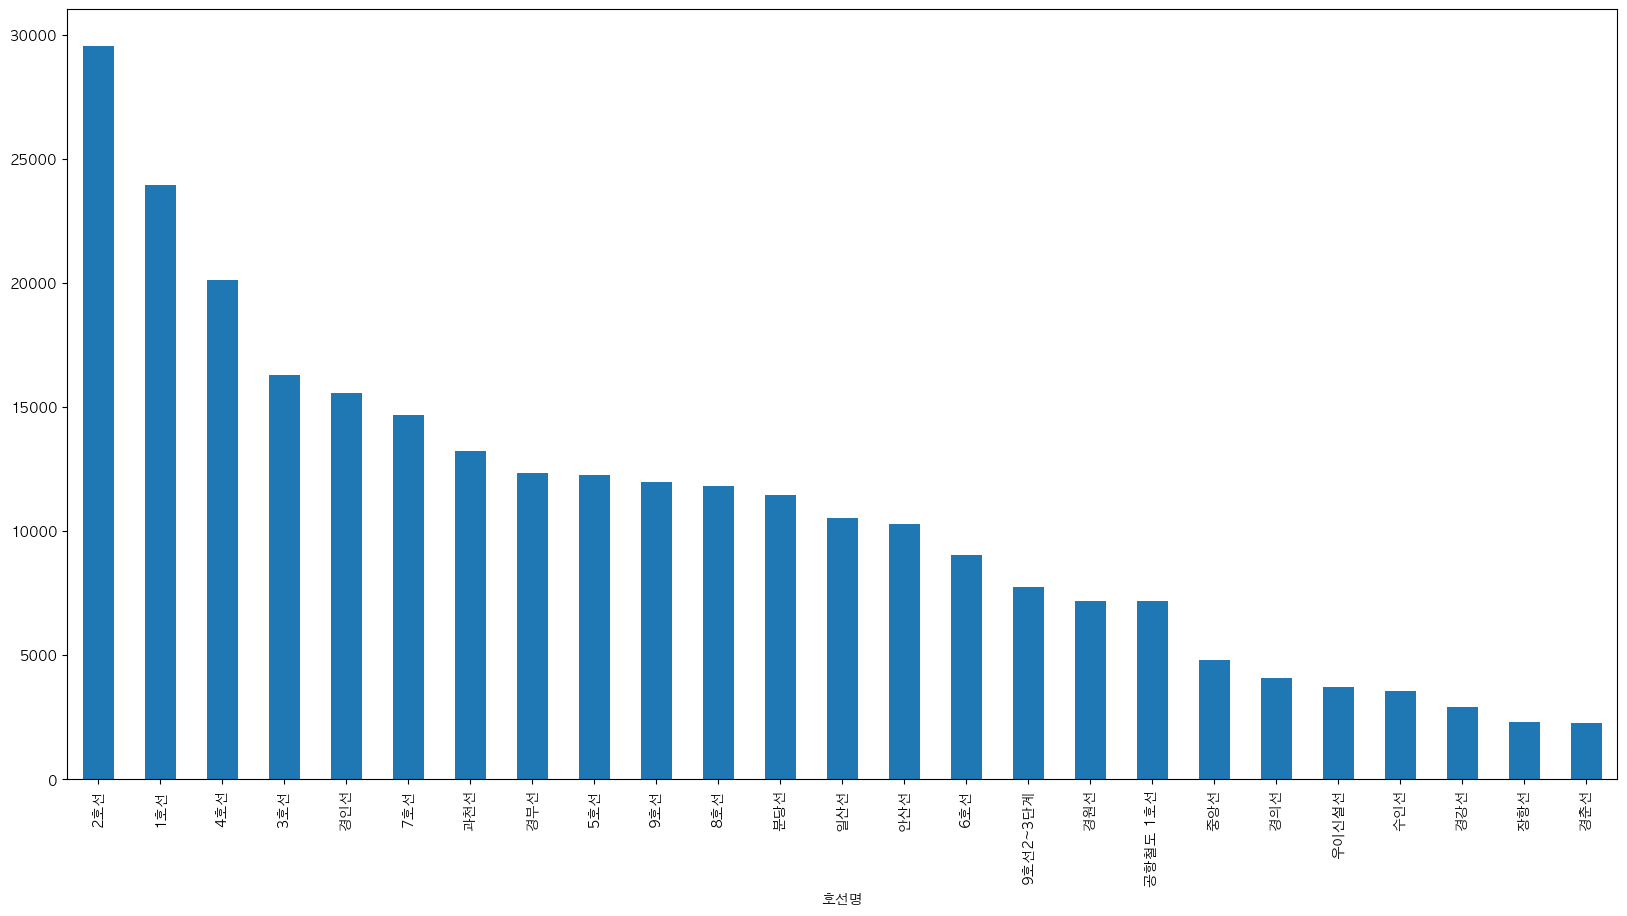

In [ ]:
metro_line = metro_recent.groupby(['호선명']).mean().reset_index()

metro_line = metro_line.drop(columns='사용월').set_index('호선명')

metro_line = metro_line.mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(20,10))
metro_line.plot(kind=('bar'))
plt.show()

In [ ]:
line='2호선'
metro_st=metro_recent.groupby(['호선명','지하철역']).mean().reset_index()
metro_st_line2=metro_st[metro_st['호선명']==line]
metro_st_line2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202106.0,68.0,5.0,5634.0,10898.0,15798.0,49800.0,37686.0,...,27475.0,13686.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
11,2호선,강변(동서울터미널),202106.0,18.0,0.0,8295.0,2136.0,27343.0,21465.0,77995.0,...,5206.0,14835.0,4.0,403.0,1.0,0.0,0.0,0.0,0.0,0.0
12,2호선,건대입구,202106.0,176.0,7.0,14205.0,2139.0,20389.0,19701.0,52326.0,...,11703.0,22174.0,15.0,2442.0,0.0,0.0,0.0,0.0,0.0,0.0
13,2호선,교대(법원.검찰청),202106.0,18.0,1.0,2366.0,6923.0,11842.0,25344.0,24154.0,...,7841.0,8012.0,3.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2호선,구로디지털단지,202106.0,285.0,6.0,40159.0,5663.0,52880.0,22522.0,134048.0,...,7902.0,36652.0,0.0,34.0,1.0,1.0,0.0,0.0,0.0,0.0
15,2호선,구의(광진구청),202106.0,50.0,1.0,13662.0,1149.0,25627.0,9640.0,66711.0,...,4342.0,16515.0,6.0,1038.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2호선,낙성대(강감찬),202106.0,56.0,0.0,11657.0,1942.0,26007.0,8488.0,77510.0,...,4231.0,22418.0,6.0,1409.0,0.0,0.0,0.0,0.0,0.0,0.0
17,2호선,당산,202106.0,44.0,4.0,6576.0,3109.0,17276.0,12432.0,45774.0,...,4488.0,13350.0,1.0,205.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2호선,대림(구로구청),202106.0,412.0,20.0,34772.0,3267.0,29903.0,11601.0,65255.0,...,3662.0,17529.0,2.0,305.0,1.0,0.0,0.0,0.0,0.0,0.0
19,2호선,도림천,202106.0,0.0,0.0,263.0,320.0,1272.0,833.0,3182.0,...,151.0,669.0,3.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 승차 인원 컬럼만 추출
metro_get_on = pd.DataFrame()
metro_get_on['지하철역']=metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_on[metro_st_line2.columns[3+2*i]]=metro_st_line2[metro_st_line2.columns[3+2*i]]
metro_get_on=metro_get_on.set_index('지하철역')
metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,68.0,5634.0,15798.0,37686.0,60412.0,47444.0,47162.0,63593.0,80198.0,96731.0,...,333597.0,202589.0,156402.0,212344.0,209363.0,27475.0,7.0,0.0,0.0,0.0
강변(동서울터미널),18.0,8295.0,27343.0,77995.0,106012.0,72448.0,50860.0,45540.0,45801.0,43734.0,...,58456.0,41062.0,30584.0,26850.0,20304.0,5206.0,4.0,1.0,0.0,0.0
건대입구,176.0,14205.0,20389.0,52326.0,88094.0,58146.0,33837.0,31591.0,36562.0,39017.0,...,79285.0,56745.0,57426.0,82927.0,81501.0,11703.0,15.0,0.0,0.0,0.0
교대(법원.검찰청),18.0,2366.0,11842.0,24154.0,33988.0,26824.0,25349.0,30985.0,34406.0,40404.0,...,146869.0,64550.0,49050.0,58044.0,53655.0,7841.0,3.0,0.0,0.0,0.0
구로디지털단지,285.0,40159.0,52880.0,134048.0,183174.0,109828.0,60920.0,54690.0,59463.0,61034.0,...,236175.0,109183.0,61807.0,56760.0,49254.0,7902.0,0.0,1.0,0.0,0.0
구의(광진구청),50.0,13662.0,25627.0,66711.0,111827.0,62341.0,32099.0,26917.0,27514.0,26932.0,...,41165.0,20148.0,15673.0,16519.0,15886.0,4342.0,6.0,0.0,0.0,0.0
낙성대(강감찬),56.0,11657.0,26007.0,77510.0,125167.0,76944.0,39332.0,33589.0,35687.0,34536.0,...,46497.0,26218.0,20440.0,20718.0,17056.0,4231.0,6.0,0.0,0.0,0.0
당산,44.0,6576.0,17276.0,45774.0,55760.0,31967.0,21461.0,20442.0,21169.0,21111.0,...,60343.0,26398.0,19514.0,22644.0,21194.0,4488.0,1.0,0.0,0.0,0.0
대림(구로구청),412.0,34772.0,29903.0,65255.0,91050.0,61110.0,33297.0,27642.0,30079.0,29912.0,...,52957.0,26990.0,18925.0,16643.0,12799.0,3662.0,2.0,1.0,0.0,0.0


In [ ]:
# 하차 인원 컬럼만 추출
metro_get_off = pd.DataFrame()
metro_get_off['지하철역']=metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_off[metro_st_line2.columns[4+2*i]]=metro_st_line2[metro_st_line2.columns[4+2*i]]
metro_get_off=metro_get_off.set_index('지하철역')
metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,5.0,10898.0,49800.0,150575.0,319617.0,310538.0,146907.0,104498.0,102420.0,121091.0,...,182063.0,99888.0,43968.0,35446.0,37493.0,13686.0,5.0,0.0,0.0,0.0
강변(동서울터미널),0.0,2136.0,21465.0,24424.0,46063.0,36699.0,34309.0,31714.0,35111.0,39567.0,...,108021.0,74801.0,47900.0,40695.0,48963.0,14835.0,403.0,0.0,0.0,0.0
건대입구,7.0,2139.0,19701.0,26069.0,61058.0,47220.0,36298.0,37929.0,46292.0,52863.0,...,144916.0,94289.0,49337.0,45034.0,50847.0,22174.0,2442.0,0.0,0.0,0.0
교대(법원.검찰청),1.0,6923.0,25344.0,58254.0,157982.0,137549.0,66113.0,51410.0,46562.0,53373.0,...,67556.0,40034.0,21605.0,19337.0,22696.0,8012.0,55.0,0.0,0.0,0.0
구로디지털단지,6.0,5663.0,22522.0,85822.0,268761.0,152613.0,57973.0,43450.0,44629.0,51260.0,...,162836.0,125661.0,76419.0,75719.0,89412.0,36652.0,34.0,1.0,0.0,0.0
구의(광진구청),1.0,1149.0,9640.0,15389.0,39614.0,22182.0,18572.0,18261.0,20806.0,23563.0,...,90738.0,64759.0,40868.0,38952.0,44587.0,16515.0,1038.0,0.0,0.0,0.0
낙성대(강감찬),0.0,1942.0,8488.0,20099.0,38509.0,30811.0,23826.0,21550.0,24991.0,25891.0,...,95878.0,81237.0,50982.0,49182.0,62294.0,22418.0,1409.0,0.0,0.0,0.0
당산,4.0,3109.0,12432.0,29933.0,78083.0,37339.0,18344.0,16913.0,18874.0,21079.0,...,73469.0,48000.0,29505.0,29942.0,33814.0,13350.0,205.0,0.0,0.0,0.0
대림(구로구청),20.0,3267.0,11601.0,24681.0,56423.0,34946.0,28143.0,28225.0,27936.0,29486.0,...,72361.0,52134.0,34930.0,44849.0,50327.0,17529.0,305.0,0.0,0.0,0.0


In [ ]:
# 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장
df = pd.DataFrame(index = metro_st_line2['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,92076,90468
강변(동서울터미널),34935,34220
건대입구,39514,42484
교대(법원.검찰청),35937,40503
구로디지털단지,66141,66032
구의(광진구청),25803,25432
낙성대(강감찬),30847,29808
당산,21019,24151
대림(구로구청),27800,28518


## 평균 승하차 인원 수 내림차순으로 막대그래프 출력

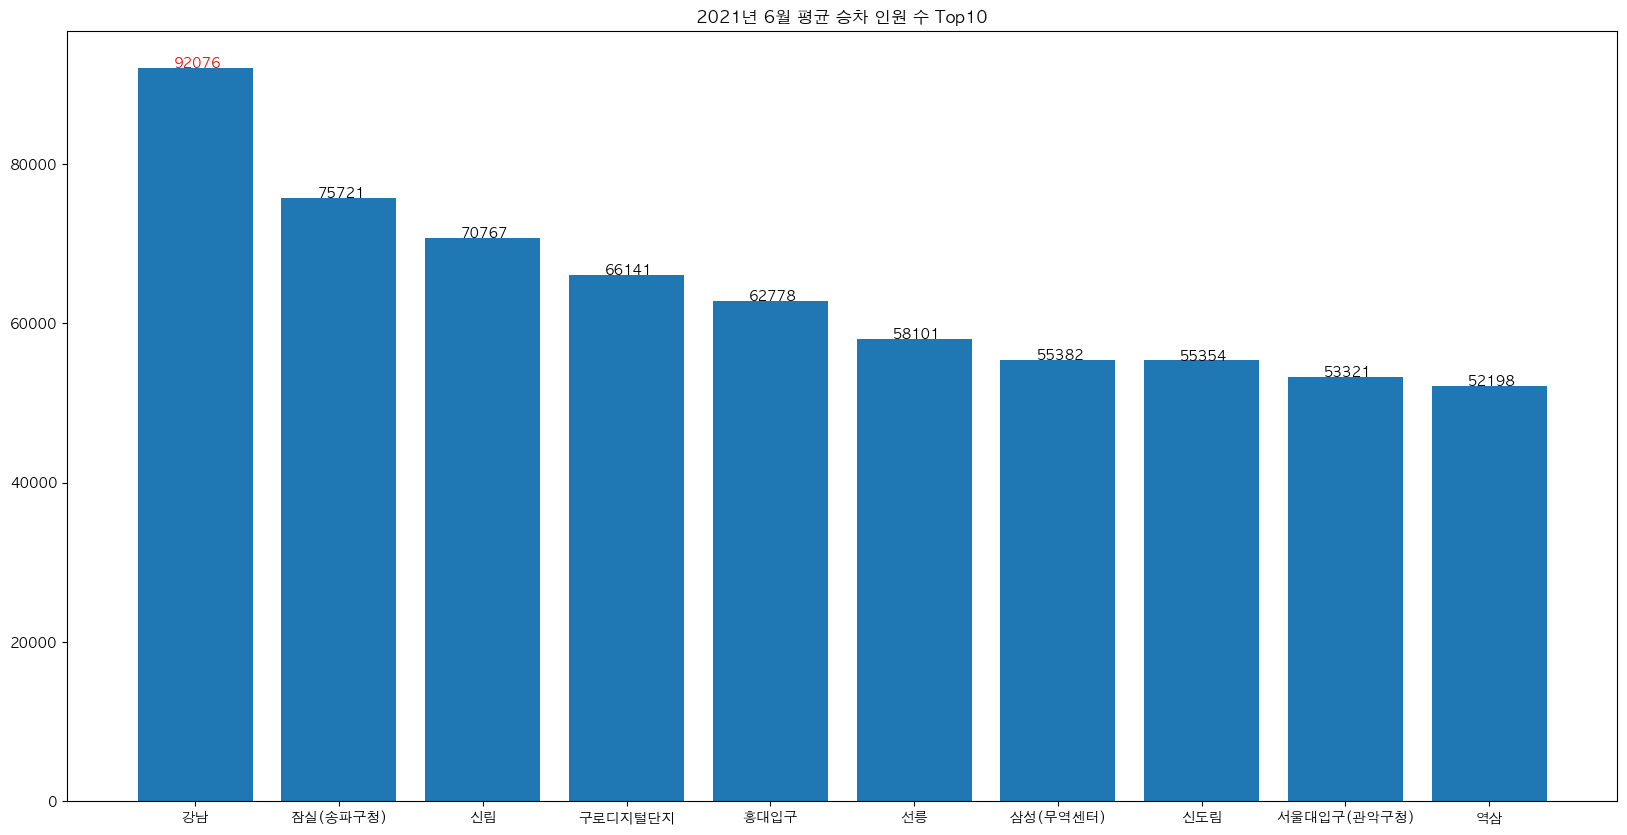

In [ ]:
# 승차 인원 수 Top10
top10_on = df.sort_values(by='평균 승차 인원 수',ascending=False).head(10)

plt.figure(figsize=(20,10))
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x,y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15,y), color = 'red')
    else :
        plt.annotate(y, (x-0.15,y))

plt.title('2021년 6월 평균 승차 인원 수 Top10')
plt.show()

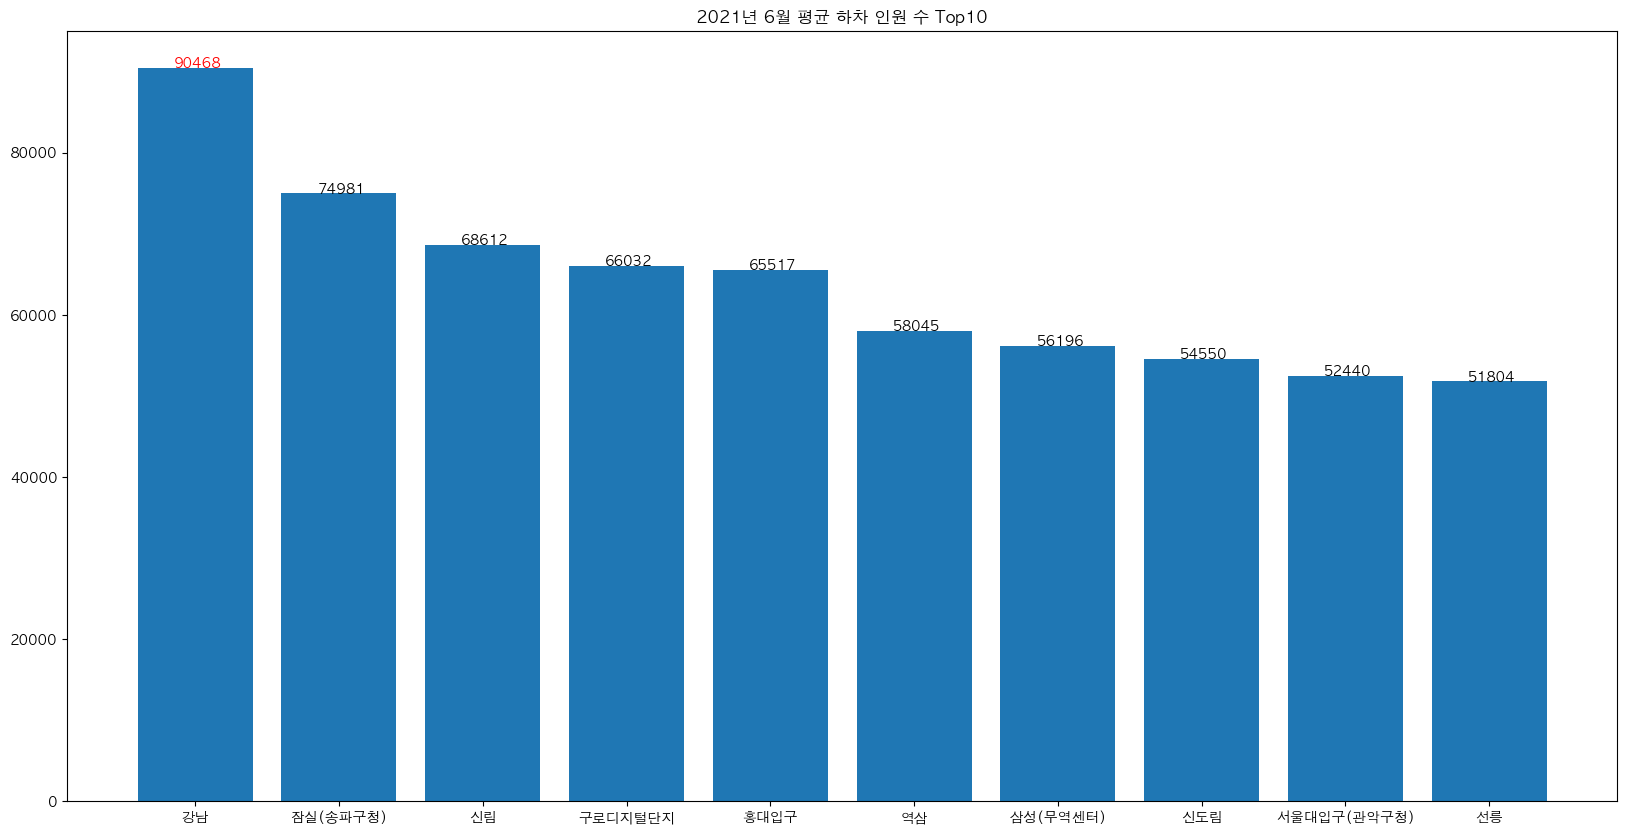

In [ ]:
# 하차 인원 수 Top10
top10_off = df.sort_values(by='평균 하차 인원 수',ascending=False).head(10)

plt.figure(figsize=(20,10))
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
for x,y in enumerate(list(top10_off['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15,y), color = 'red')
    else :
        plt.annotate(y, (x-0.15,y))

plt.title('2021년 6월 평균 하차 인원 수 Top10')
plt.show()

## 특정 호선의 혼잡 정도와 위치좌표 데이터 병합
### 데이터 링크
### https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword
### https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord